In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
file = "D:/Datasets/IEMOCAP/Data/Ses01F_impro01_F000.wav"
audio, sr = librosa.load(file, sr=16000)
print(audio.size)       #The number of samples in the digitalised audio

31129


In [3]:
# Create Mel filter banks
filter_banks = librosa.filters.mel(n_fft=1024,sr=sr,n_mels=40)    #n_fft: frame size, sr: sample rates; n_Mels: the number of Mels
print(filter_banks.shape)

(40, 513)


In [4]:
# Create spectrogram by STFT
spectrogram = librosa.core.stft(y=audio, n_fft=1024, win_length=400, window="ham")
print(spectrogram.shape)

(513, 312)


In [5]:
# Compute the Log-Mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(S=spectrogram, sr=sr, window=False, n_mels=40)
print(mel_spectrogram.shape)

(40, 312)


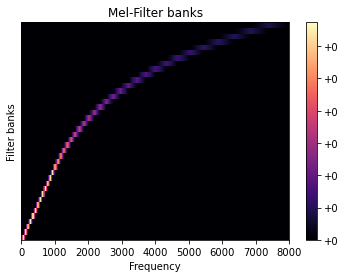

In [6]:
# Visualise the filter banks
librosa.display.specshow(filter_banks, sr=sr, x_axis="linear")
plt.colorbar(format="%+2.f")
plt.xlabel("Frequency")
plt.ylabel("Filter banks")
plt.title("Mel-Filter banks")
plt.show()

In [7]:
# Extract Mel-Spectrograms
mel_spectrogram = librosa.feature.melspectrogram(audio, sr=sr, n_fft=2048, hop_length=512, n_mels=40)
print(mel_spectrogram.shape)    #n_mels * n_frames

(40, 61)


D:\Programs\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
D:\Programs\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


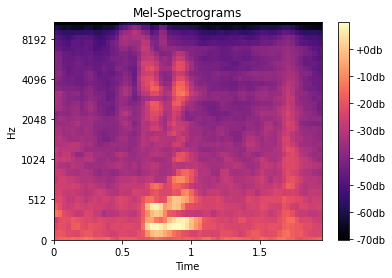

In [8]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.fdb")
plt.title("Mel-Spectrograms")
plt.show()

In [9]:
print(len(log_mel_spectrogram.T))

61


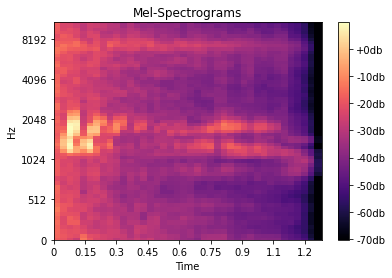

In [10]:
specs = log_mel_spectrogram.T
librosa.display.specshow(specs, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.fdb")
plt.title("Mel-Spectrograms")
plt.show()